In [2]:
!pip install keras

In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
train = pd.read_csv('D:\Projekat 2022\dataset\MNIST\sign_mnist_train.csv')
test = pd.read_csv('D:\Projekat 2022\dataset\MNIST\sign_mnist_test.csv')

In [18]:
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype = 'float32')

In [443]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [21]:
train_data.shape

(27455, 785)

In [22]:
test_data.shape

(7172, 785)

In [25]:
28 * 28

784

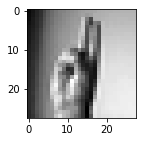

In [108]:
i = random.randint(1, train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i, 1:].reshape(28,28), cmap = 'gray')
#print("Label for the image is: ", class_names[int(train_data[i,0])])

In [110]:
print("Label for the image is: ", class_names[int(train_data[i,0])])

Label for the image is:  U


Text(0.5, 1.0, 'Label')

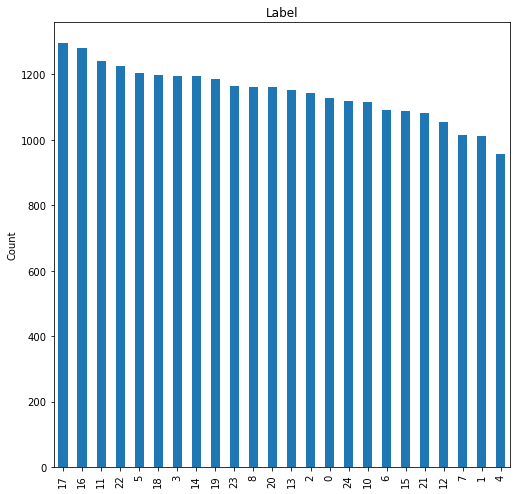

In [117]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [118]:
X_train = train_data[:, 1:] / 255
X_test = test_data[:, 1:] / 255

In [119]:
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [125]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [126]:
X_train.shape

(27455, 28, 28, 1)

In [129]:
#MODEL

In [131]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))

model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [133]:
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 31s 137ms/step - loss: 2.8334 - acc: 0.1368 - val_loss: 1.8375 - val_acc: 0.4322
Epoch 2/10
215/215 [==============================] - 29s 134ms/step - loss: 1.3264 - acc: 0.5586 - val_loss: 0.8217 - val_acc: 0.7269
Epoch 3/10
215/215 [==============================] - 30s 140ms/step - loss: 0.7677 - acc: 0.7392 - val_loss: 0.5916 - val_acc: 0.7913
Epoch 4/10
215/215 [==============================] - 30s 137ms/step - loss: 0.5280 - acc: 0.8195 - val_loss: 0.4428 - val_acc: 0.8348
Epoch 5/10
215/215 [==============================] - 31s 144ms/step - loss: 0.3947 - acc: 0.8642 - val_loss: 0.3627 - val_acc: 0.8705
Epoch 6/10
215/215 [==============================] - 33s 151ms/step - loss: 0.3135 - acc: 0.8947 - val_loss: 0.2700 - val_acc: 0.9172
Epoch 7/10
215/215 [==============================] - 35s 163ms/step - loss: 0.2413 - acc: 0.9225 - val_loss: 0.2435 - val_acc: 0.9221
Epoch 8/10
215/215 [==============================] - 3

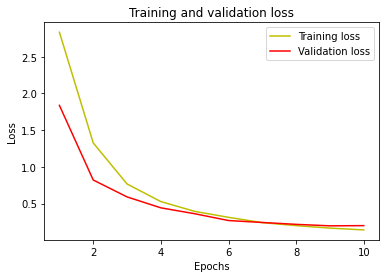

In [134]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

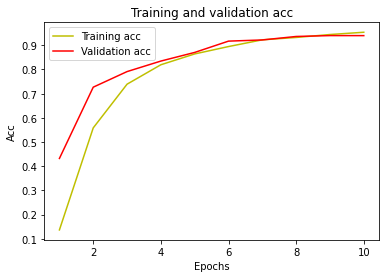

In [136]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [138]:
acc

[0.13684210181236267,
 0.5585867762565613,
 0.7392095923423767,
 0.8195228576660156,
 0.8642141819000244,
 0.8947368264198303,
 0.9225277900695801,
 0.9323256015777588,
 0.9444909691810608,
 0.9538881778717041]

In [153]:
prediction_x = model.predict(X_test) 
classes = np.argmax(prediction_x, axis=1)

225/225 [==============================] - 2s 11ms/step


In [183]:
prediction_x[:]

array([[1.37529120e-11, 2.23541984e-11, 1.95720437e-04, ...,
        1.30798822e-12, 2.92968834e-05, 4.93903196e-10],
       [5.26226351e-09, 7.09753876e-05, 2.60298754e-13, ...,
        1.83520676e-03, 5.07301562e-11, 2.15907692e-09],
       [1.05703866e-11, 3.66602934e-13, 1.64949370e-16, ...,
        4.58772185e-08, 7.07240690e-12, 3.09005122e-06],
       ...,
       [6.12367267e-18, 1.00199968e-16, 9.77166057e-01, ...,
        6.35531830e-30, 1.43380785e-11, 7.46052567e-26],
       [1.52756865e-08, 6.42344511e-12, 1.87957494e-09, ...,
        1.98602053e-18, 6.34603577e-18, 4.94192908e-22],
       [2.42446405e-19, 1.07081434e-17, 9.50852931e-01, ...,
        9.29432056e-32, 6.60279383e-12, 1.90309959e-27]], dtype=float32)

In [223]:
np.where(prediction_x[1:, :] == np.max(prediction_x[1, :]))

(array([0], dtype=int64), array([5], dtype=int64))

In [219]:
prediction = np.ones(prediction_x.shape[0])

for i in range(prediction_x.shape[0]):
    prediction[i] = np.where(prediction_x[i, :] == np.max(prediction_x[i, :]))[0]

In [220]:
prediction

array([ 6.,  5., 10., ...,  2.,  4.,  2.])

In [224]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy score = ', accuracy)

Accuracy score =  0.9399051868377022


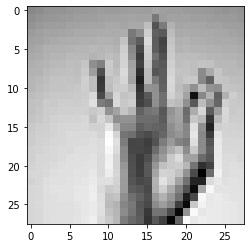

In [434]:
i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0], cmap = 'gray') 


In [435]:
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

Predicted Label:  F
True Label:  F


In [436]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction)

<AxesSubplot:>

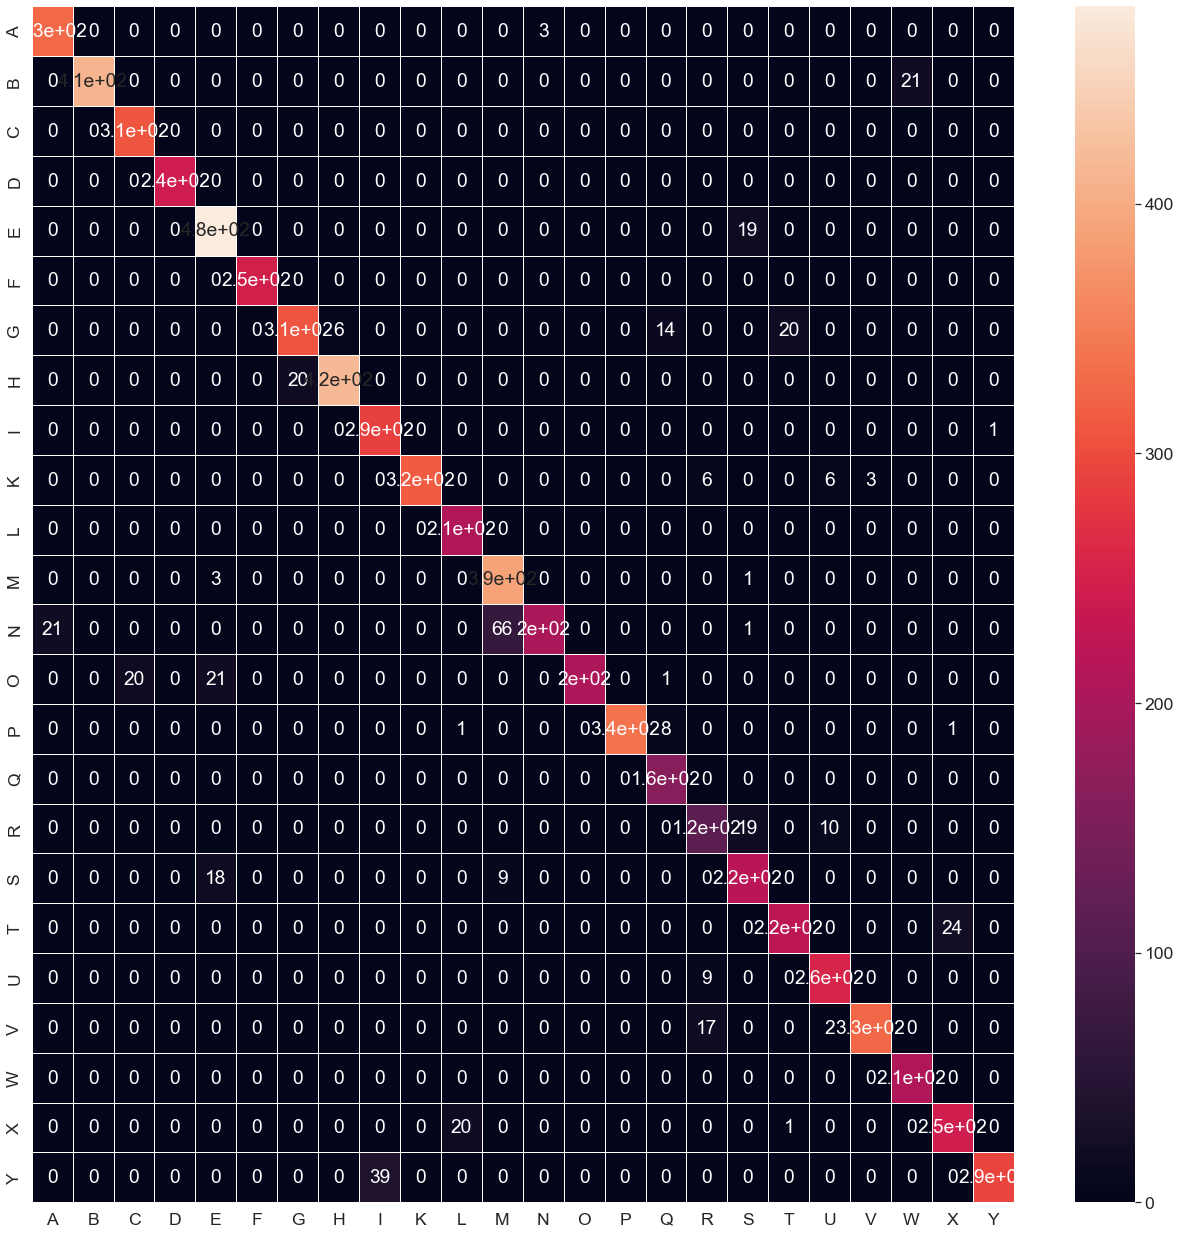

In [444]:
fig, ax = plt.subplots(figsize=(22,22))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, xticklabels = class_names, yticklabels = class_names)

([<matplotlib.axis.XTick at 0x2053184a8e0>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H'),
  Text(8, 0, 'I'),
  Text(9, 0, 'K'),
  Text(10, 0, 'L'),
  Text(11, 0, 'M'),
  Text(12, 0, 'N'),
  Text(13, 0, 'O'),
  Text(14, 0, 'P'),
  Text(15, 0, 'Q'),
  Text(16, 0, 'R'),
  Text(17, 0, 'S'),
  Text(18, 0, 'T'),
  Text(19, 0, 'U'),
  Text(20, 0, 'V'),
  Text(21, 0, 'W'),
  Text(22, 0, 'X'),
  Text(23, 0, 'Y')])

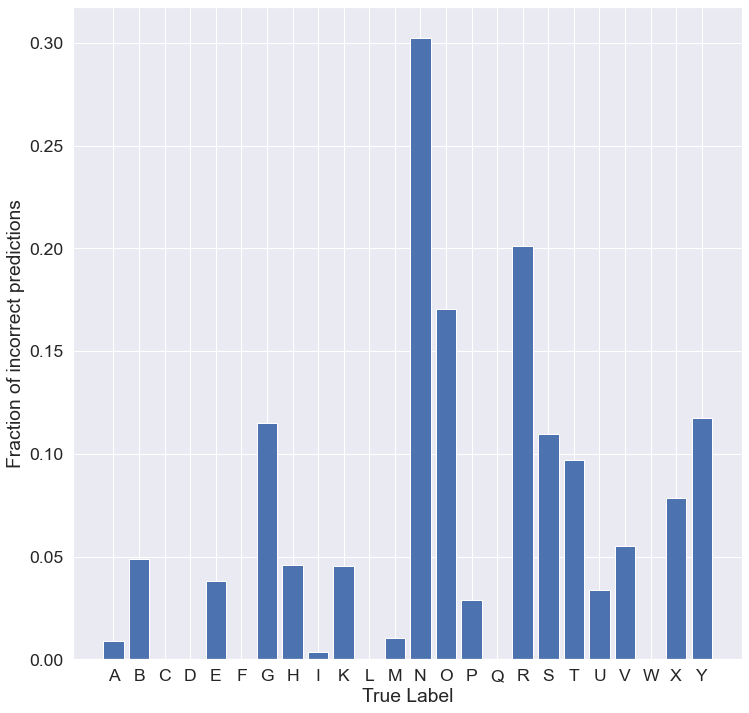

In [446]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(24), class_names) 